Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
crop_data = pd.read_csv('Crop.csv')

Examining the data

In [3]:
crop_data.head(7)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42,42.0,20.130175,81.604873,7.628473,262.717340,rice
5,69.0,37,42.0,23.058049,83.370118,7.073454,251.055000,rice
6,69.0,55,38.0,22.708838,82.639414,5.700806,271.324860,rice


In [4]:
crop_data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107.0,34,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32,34.0,26.272418,52.127394,6.758793,127.175293,coffee
2199,104.0,18,30.0,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2163.000000,2200.000000,2199.000000,2165.000000,2200.000000,2200.000000,2191.000000
mean,50.538141,53.362727,48.160528,25.606752,71.481779,6.469480,103.498641
std,36.832820,32.985883,50.656609,5.059042,22.263812,0.773938,54.896599
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.766430,60.261953,5.971693,64.576836
50%,37.000000,51.000000,32.000000,25.600337,80.473146,6.425045,94.953353
75%,84.000000,68.000000,49.000000,28.558525,89.948771,6.923643,124.308842
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Cleaning the Data

In [6]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2163 non-null   float64
 1   P            2200 non-null   int64  
 2   K            2199 non-null   float64
 3   temperature  2165 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2191 non-null   float64
 7   label        2194 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 137.6+ KB


So we can see there are null values.Let's take the exact count.

In [7]:
crop_data.isnull().sum()

N              37
P               0
K               1
temperature    35
humidity        0
ph              0
rainfall        9
label           6
dtype: int64

Checking unique values of 'label' so that we can find if there are any unwanted things.

In [8]:
crop_data['label'].unique()

array(['rice', 'unknown', 'maize', 'chickpea', nan, 'kidneybeans',
       'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil',
       'pomegranate', 'banana', 'mango', 'grapes', 'watermelon',
       'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton',
       'jute', 'coffee'], dtype=object)

It contains 'unknown' value so we can remove them if they are less.

In [9]:
crop_data[(crop_data['label']=='unknown')]

,N,P,K,temperature,humidity,ph,rainfall,label
83,67.0,43,39.0,NaN,84.969072,5.999969,186.753677,unknown
1785,48.0,57,54.0,29.02328,90.203968,6.617703,126.806987,unknown
2072,70.0,42,43.0,23.16815,76.667250,6.508343,157.121505,unknown


In [10]:
#removing "unknown"
crop_data.drop(crop_data.loc[(crop_data['label']=='unknown')].index,inplace=True)
crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', nan, 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Let's remove rows containing missing values

In [11]:
crop_data.dropna(inplace=True)
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Now data is cleaned , we can visulaize it. I am making a copy of data so that further changes in the data will not interfere visualization 

In [12]:
crop_data1 = crop_data.copy(deep = True)
crop_data1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42,42.0,20.130175,81.604873,7.628473,262.717340,rice


Text(0, 0.5, 'Counts')

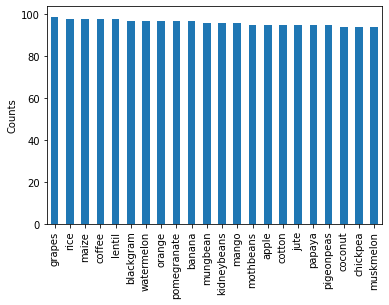

In [13]:
ax = crop_data1['label'].value_counts().plot(kind='bar')
ax.set_ylabel("Counts")

 The dataset is well balanced.
 
 We are plotting the relations between crops and the attributes(N,P,K,temperature,humidity,ph,rainfall).

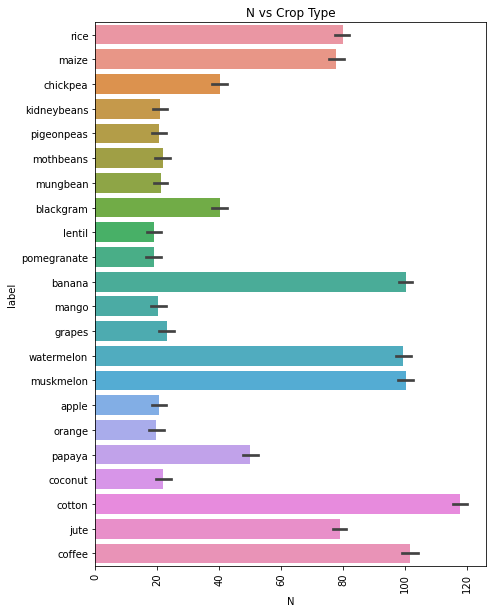

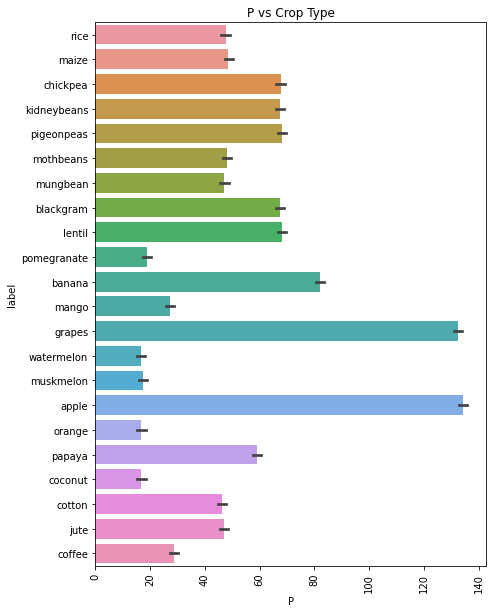

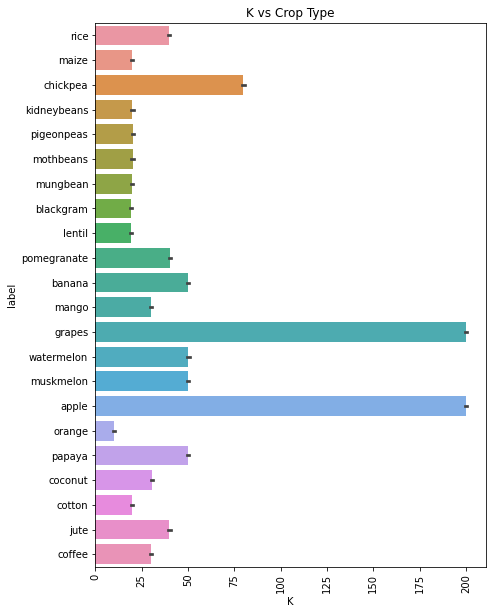

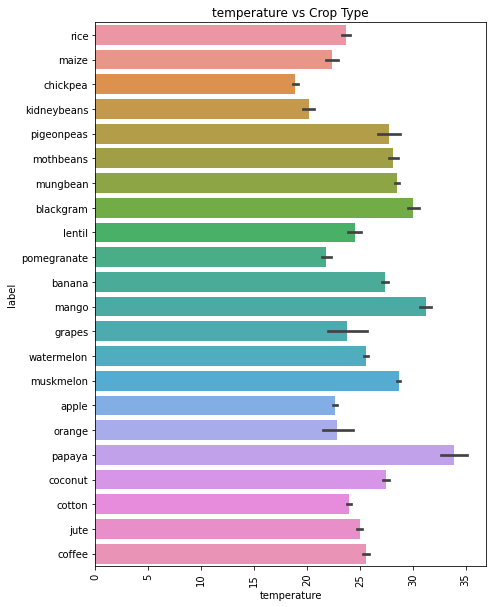

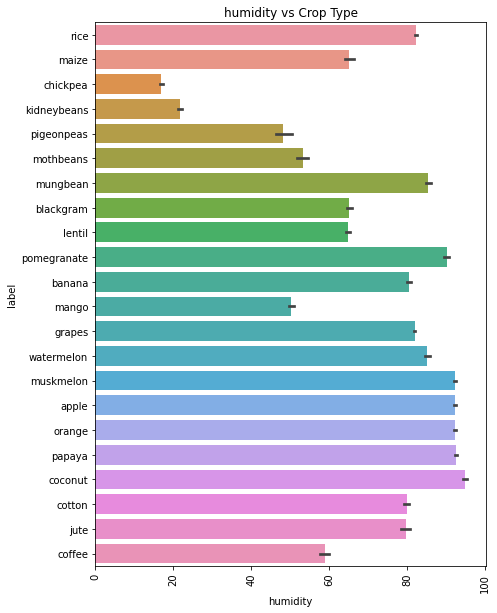

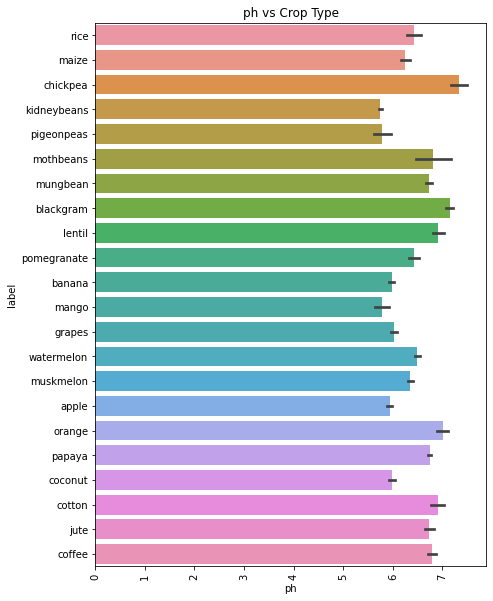

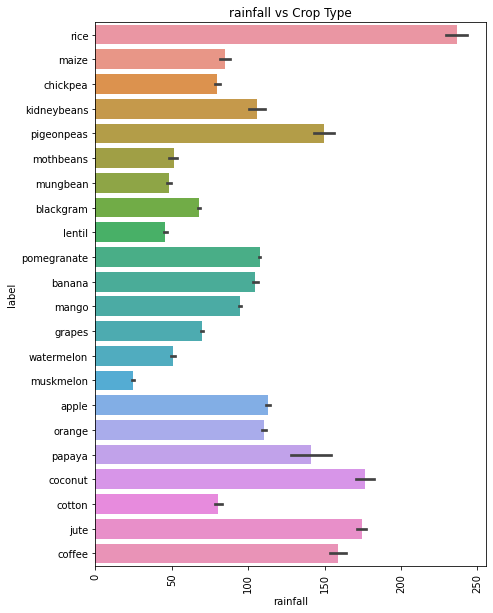

In [14]:
columns = crop_data1.columns[:-1]
for column in columns:
    plt.figure(figsize=(7,10))
    sns.barplot(x =column, y = 'label', data = crop_data1)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

plotting multiple pairwise bivariate distributions in a dataset

<Figure size 1440x1224 with 0 Axes>

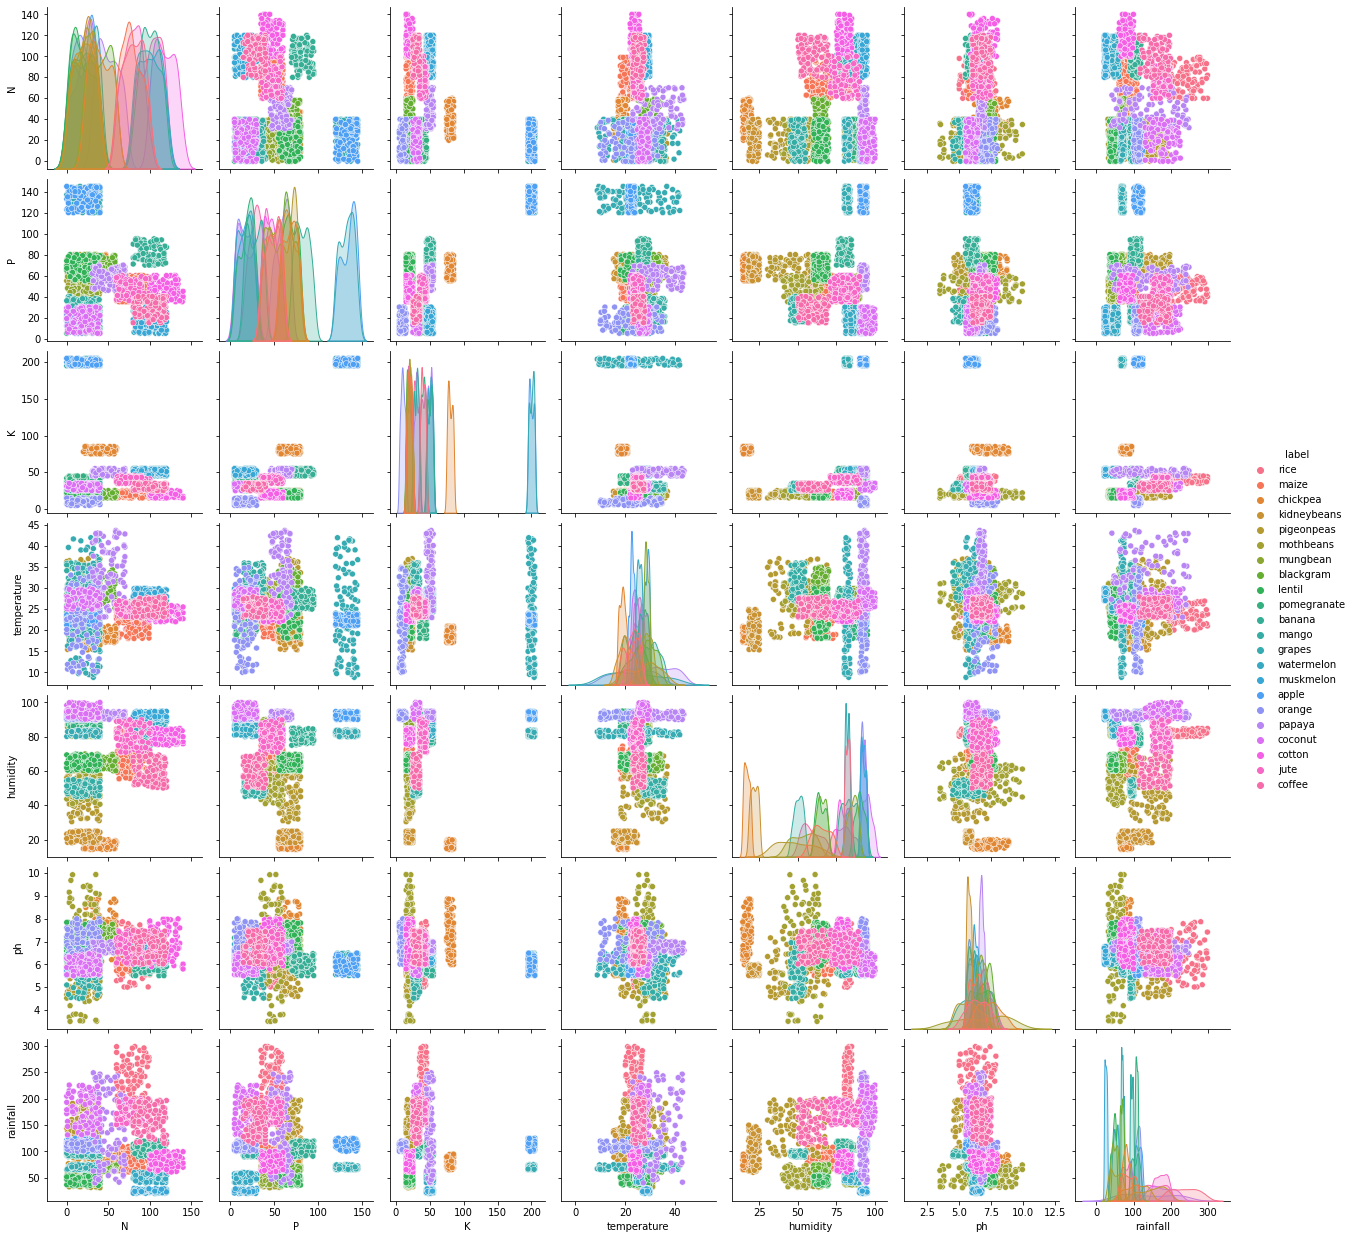

In [15]:
plt.figure(figsize=(20,17))
sns.pairplot(crop_data1, hue = "label")
plt.show()

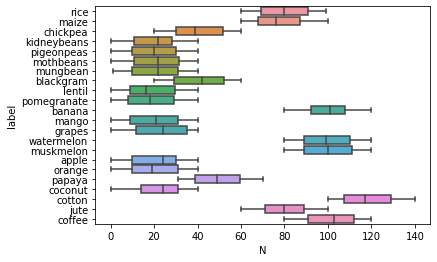

In [16]:
sns.boxplot(y='label',x='N',data=crop_data1)

From the above boxplot it is clear that  legumes can grow in soil having low amount of nitrogen. Legumes (peas, beans etc) grow in a symbiotic relationship with soil-dwelling bacteria(Rhizobium,Azospirillum etc). The bacteria take gaseous nitrogen from the air in the soil and feed this nitrogen to the legumes.

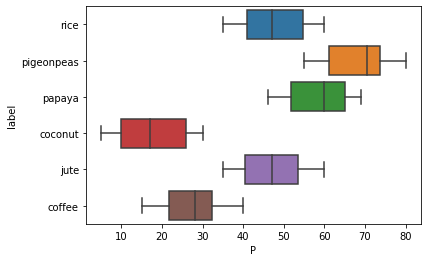

In [17]:
sns.boxplot(y='label',x='P',data=crop_data1[crop_data1['rainfall']>150])

Another interesting analysis where Phosphorous levels are quite differentiable when it rains heavily (above 150 mm).

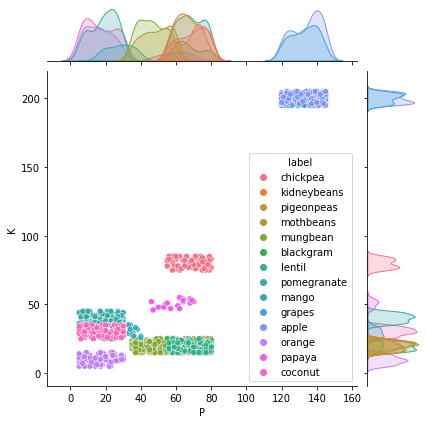

In [18]:
sns.jointplot(x="P",y="K",data=crop_data1[(crop_data1['temperature']<30) & (crop_data1['N']<50)],hue="label")

Apple,grapes like nutrients rich plants grows in the soil having large amount of   "P" , "K".

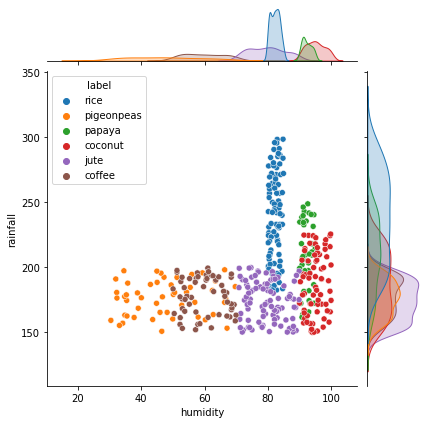

In [19]:
sns.jointplot(x="humidity",y="rainfall",data=crop_data1[(crop_data1['rainfall']>150)],hue="label")

Majority of the coconut production in india contributed by coastal (humid) regions of Kerala,Karnataka,Tamilnadu ,where rainfall is also high.

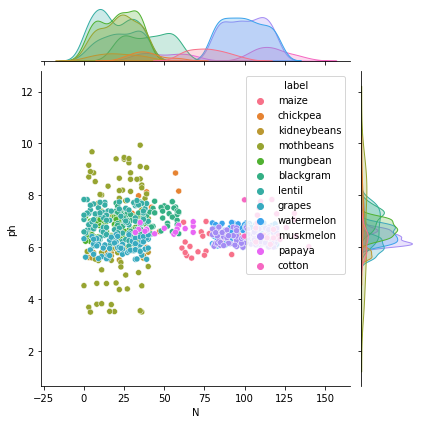

In [20]:
sns.jointplot(x="N",y="ph",data=crop_data1[(crop_data1['rainfall']<70)],hue="label")

Mothbeans can grow over a wide range of ph values. 

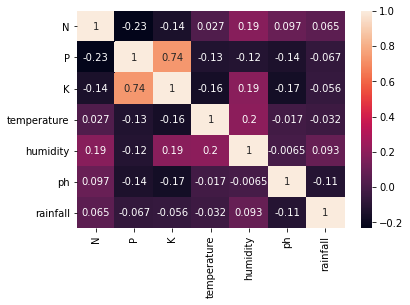

In [21]:
sns.heatmap(crop_data1.corr(),annot=True)

We can see how Phosphorous levels and Potassium levels are highly correlated.

**Seperating fetures and Target label**

In [22]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
crop_data['label'] = lbe.fit_transform(crop_data['label'])
from sklearn.model_selection import cross_val_score

In [23]:
y = crop_data['label']
y.head()

0    20
1    20
2    20
3    20
4    20
Name: label, dtype: int64

In [24]:
features = crop_data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
X= crop_data.drop('label' ,axis =1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42,42.0,20.130175,81.604873,7.628473,262.717340


**Feature Scaling and Train - Test set splitting**

In [25]:
model = []
accuracy = []
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=20,shuffle=True)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training and Testing with various ML models

**DECISION TREE**

In [26]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier()
DTree.fit(X_train_scaled , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Measuring accuracy of prediction done by Decision Tree

In [27]:
predict = DTree.predict(X_test_scaled)
DTree_accuracy = DTree.score(X_test_scaled,y_test)
DTree_accuracy

0.9764150943396226

In [28]:
accuracy.append(DTree_accuracy)
model.append('Decision Tree')

Measuring accuracy over cross validation.

In [29]:
score = cross_val_score(DTree, features, y,cv=5)
score

array([0.98584906, 0.98108747, 0.98108747, 0.99054374, 0.98345154])

**RANDOM FOREST**

In [30]:
from sklearn.ensemble import RandomForestClassifier
RForest = RandomForestClassifier()
RForest.fit(X_train_scaled , y_train)
RandomForestClassifier()
RForest_accuracy = RForest.score(X_test_scaled,y_test)
RForest_accuracy

0.9905660377358491

In [31]:
accuracy.append(RForest_accuracy)
model.append('Random Forest')

In [32]:
score = cross_val_score(RForest, features, y,cv=5)
score

array([0.99764151, 0.99054374, 0.99763593, 0.99527187, 0.98817967])

**K Nearest Neighbour**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


Finding accuracy of prediction for each value of k from 1 to 30

In [34]:

k_range = range(1,30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    knn_score = knn.score(X_test_scaled, y_test)
    print(f"Accuracy at k = {k} is {knn_score}")
    scores.append(np.mean(knn_score))
     


Accuracy at k = 1 is 0.9740566037735849
Accuracy at k = 2 is 0.9669811320754716
Accuracy at k = 3 is 0.9787735849056604
Accuracy at k = 4 is 0.9716981132075472
Accuracy at k = 5 is 0.9764150943396226
Accuracy at k = 6 is 0.9669811320754716
Accuracy at k = 7 is 0.9693396226415094
Accuracy at k = 8 is 0.9669811320754716
Accuracy at k = 9 is 0.9740566037735849
Accuracy at k = 10 is 0.9622641509433962
Accuracy at k = 11 is 0.9693396226415094
Accuracy at k = 12 is 0.9693396226415094
Accuracy at k = 13 is 0.9599056603773585
Accuracy at k = 14 is 0.964622641509434
Accuracy at k = 15 is 0.9622641509433962
Accuracy at k = 16 is 0.9622641509433962
Accuracy at k = 17 is 0.9622641509433962
Accuracy at k = 18 is 0.9622641509433962
Accuracy at k = 19 is 0.9622641509433962
Accuracy at k = 20 is 0.9575471698113207
Accuracy at k = 21 is 0.9575471698113207
Accuracy at k = 22 is 0.9528301886792453
Accuracy at k = 23 is 0.9528301886792453
Accuracy at k = 24 is 0.9504716981132075
Accuracy at k = 25 is 0.95

Obtaining maxmimum accuracy and coorresponding K value

In [35]:
knn_accuracy = np.amax(scores)  

max_index = np.argmax(scores)




In [36]:
print(f"Maximmum accuracy  is {knn_accuracy} at k = {max_index+1} ")


Maximmum accuracy  is 0.9787735849056604 at k = 3 


In [37]:
accuracy.append(knn_accuracy)
model.append('KNN')

In [38]:
score = cross_val_score(knn, features, y,cv=5)
score

array([0.95518868, 0.96217494, 0.97163121, 0.95508274, 0.96217494])

**CONCLUSION**

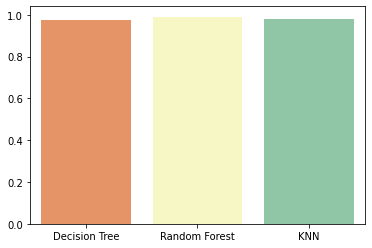

In [39]:
model
accuracy
sns.barplot(x = model , y = accuracy ,palette ='Spectral')

Decision Tree, Random Forest, KNN models are predicting crop with more than 97% accuracy.In which Random Forest having slightly greater accuracy.